In [195]:
from __future__ import print_function, division

from IPython.core.display import Image, HTML

import numpy as np
import pandas as pd

from scipy.cluster import hierarchy

import matplotlib.pyplot as plt
%matplotlib inline

PATH = '/Users/ac/Downloads/assets'

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Intro to Hierarchical Clustering
Week 7 | Lesson 2.3

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Perform a Hierarchical Clustering
- Plot, Analyze, and Understand the Dendrogram
- Understand Linkages

### LESSON GUIDE
| TIMING  | TYPE  | TOPIC  |
|:-:|---|---|
| 5 min  | Opening | Opening |
| 10 min  | Introduction  | What is Hierarchical Clustering?  |
| 15 min  | Demo | Example of Hierarchical Clustering  |
| 25 min  | Guided Practice | Hierarchical Clustering in Python |
| 25 min  | Independent Practice | Implement hierarchical clustering
| 5 min  | Conclusion  | Conclusion  |

## Clustering Review

### What we're doing

> In clustering, we seek to use the similarities between features to infer groupings

### How we know we're doing it well

> We see high intra-cluster similarity and low inter-cluster similarity

### What we've seen so far:

### K-Means

### How K-Means works:

- Pick k
- Select k random points in the feature space
- Calculate the nearest centroid to each point
- Move centroid to the center of the associated points
- Repeat last two steps until centroids stabilize

### Visually:

In [33]:
Image(url="http://simplystatistics.org/wp-content/uploads/2014/02/kmeans.gif")

## K-Means

### Pros:

- Easy to implement even on relatively large data sets ( ~$O(n)$ )
- Usually "good enough" results

### Cons:

- Requires an arbitrary k
- Sensitive to outliers (k-medians is more robust)
- With random initial centroids lacks repeatability (but can be seeded)
- Works best if data conforms to circular -> spherical -> hyperspherical shape (n.b. using means)
- Works best with similar density clusters

## K-Means is an example of "Flat Clustering"

## Today we look at Hierarchical Clustering

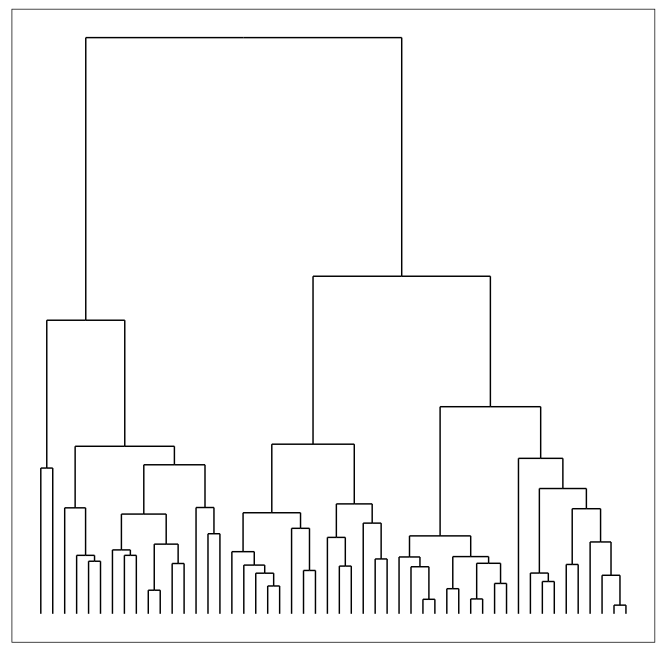

In [67]:
Image(PATH + '/images/denex.png', width=400)

## What is Hierarchical Clustering?

It is an iterative approach to clustering that works by computing pairwise distances between clusters

## Two Approaches: Agglomorative and Divisive

## Agglomorative (bottom-up)

Agglomorative works by starting with each point in a separate group. At each step the two points/clusters with the least distance between them are linked. This continues until there is only one cluster.

## Divisive (top-down)

Divisive clustering works the opposite way. All points are in a single cluster to begin with. At each iteratiion, the points with the greatest distance are serparated.

## Agglomorative is far more common in practice (simpler to implement), so we'll be focusing on that.

## Visualization of the agglomorative process

In [58]:
Image(url='http://i.makeagif.com/media/2-24-2014/DkJOLy.gif', width=500)

## Step by step

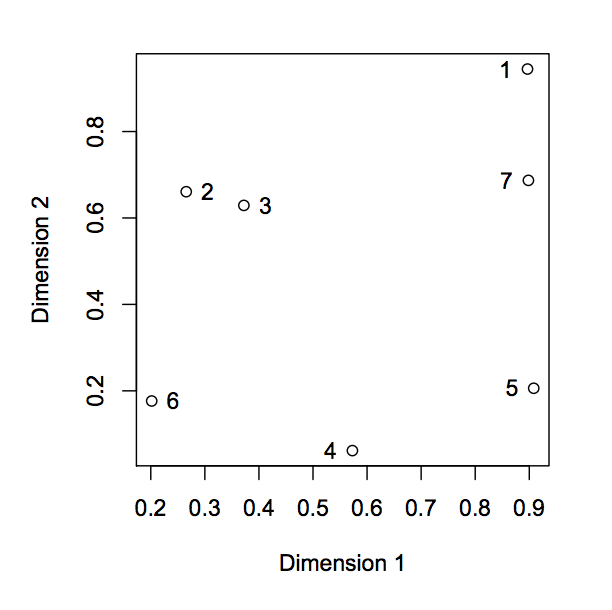

In [68]:
Image(PATH + '/images/glom_steps1.png', width=500)

## We'll start the process...

At each step we greedily merge to two nearest points

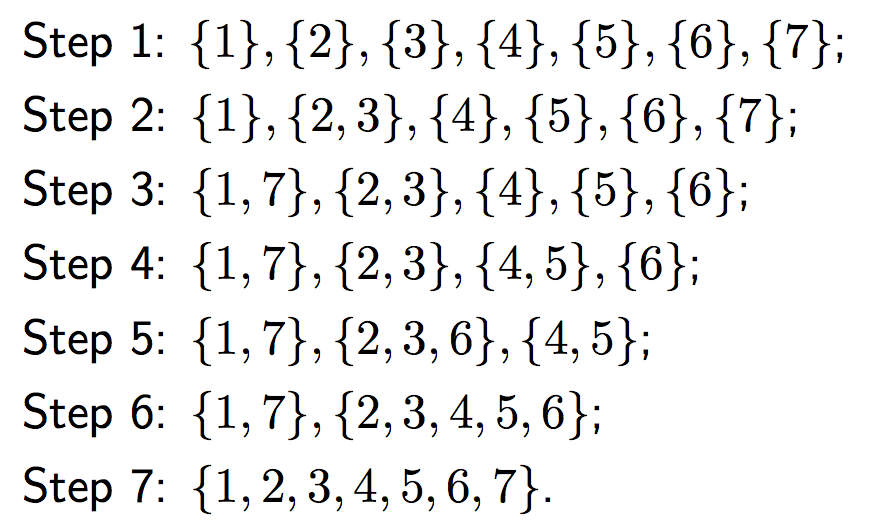

In [69]:
Image(PATH + '/images/glom_steps2.png', width=500)

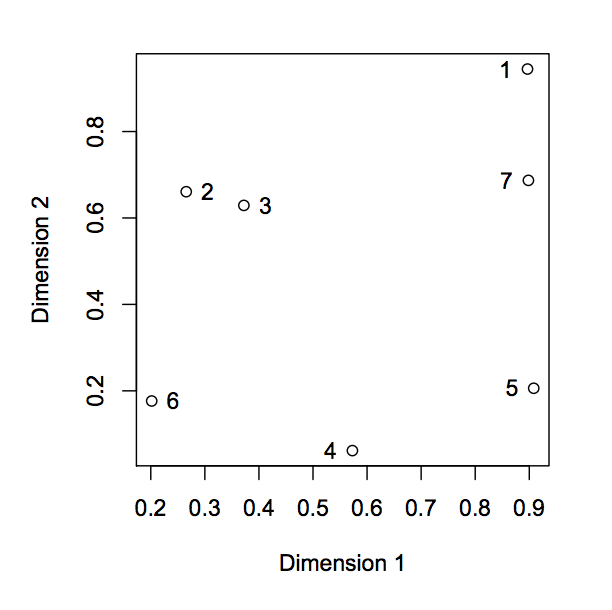

In [189]:
Image(PATH + '/images/glom_steps1.png', width=500)

## We can visualize it with a dendrogram

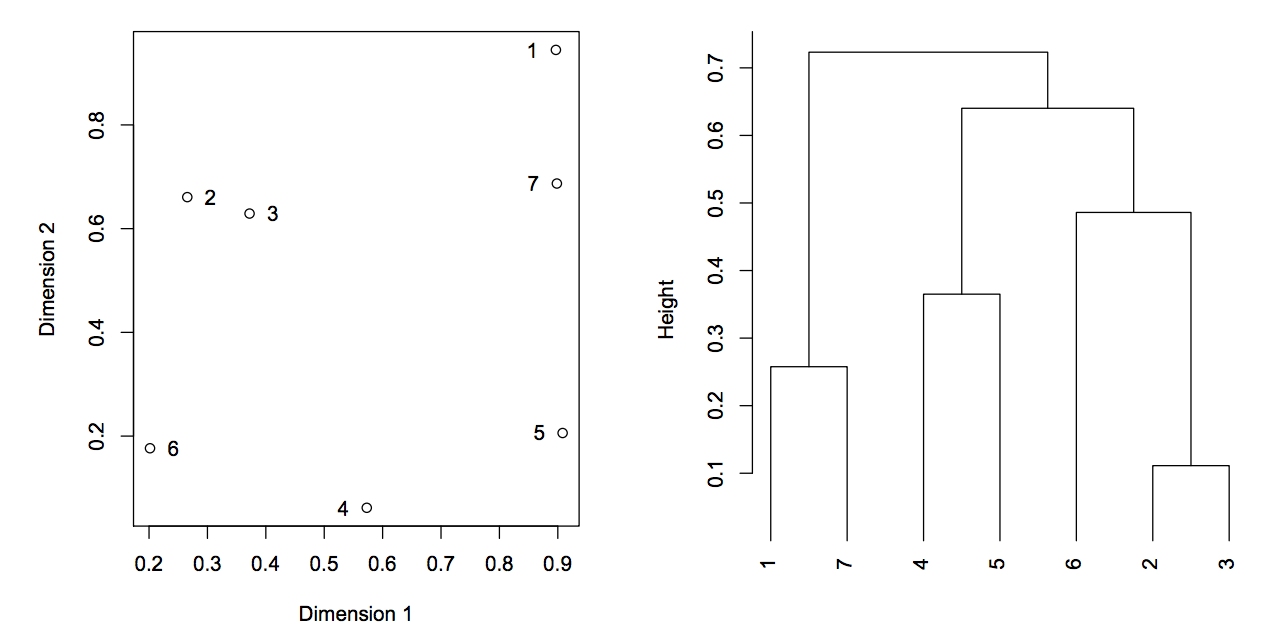

In [70]:
Image(PATH + '/images/glom_steps3.png', width=700)

## Clusters side-by-side with dendrogram

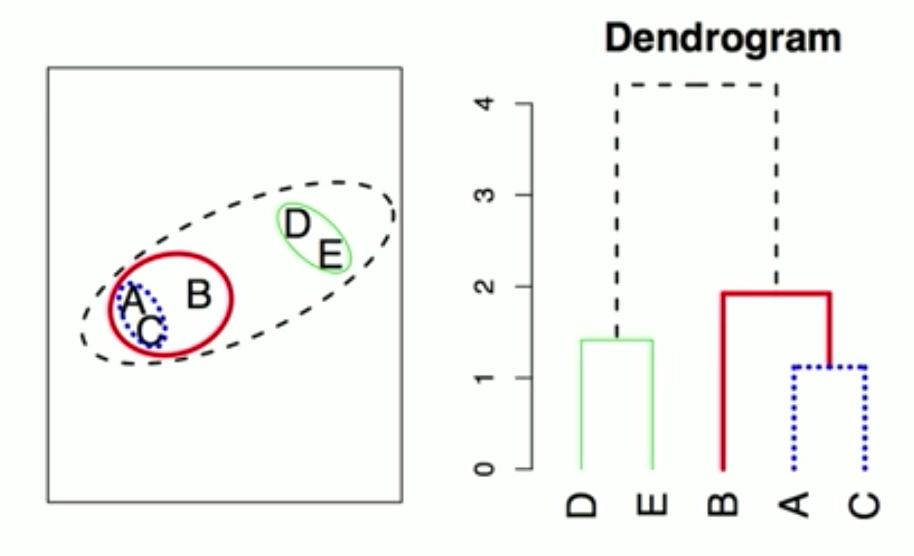

In [71]:
Image(PATH + '/images/two_views.png', width=700)

## Dendrogram Properties:

- Each leaf corresponds to a single point
- Each internal node reprsents a cluster
- Each node has two child nodes
- The root node encompases all points
- The height of each node is proportional to the distance between each cluster

## So how do we calculate the distance between the clusters?

## Three Basic Options (but there are more):

We use a distance metric (typically euclidean) calculated in one of the following ways:

- Single Linkage

- Complete Linkage

- Average

## Single Linkage

Is the shortest distance between all points in the cluster

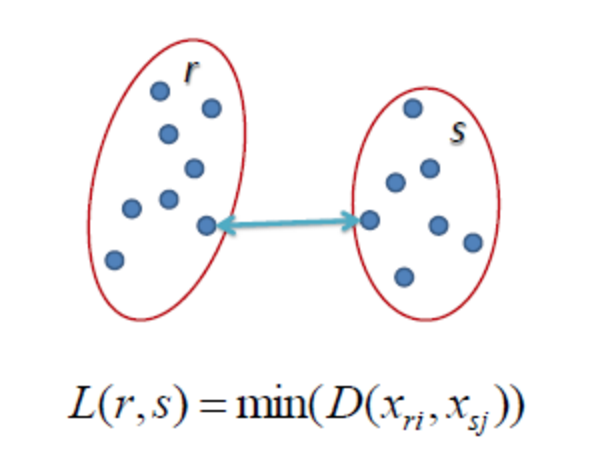

In [190]:
Image(PATH + '/images/single.png', width=500)

## Complete Linkage

Is the furthest distance between all points in the cluster

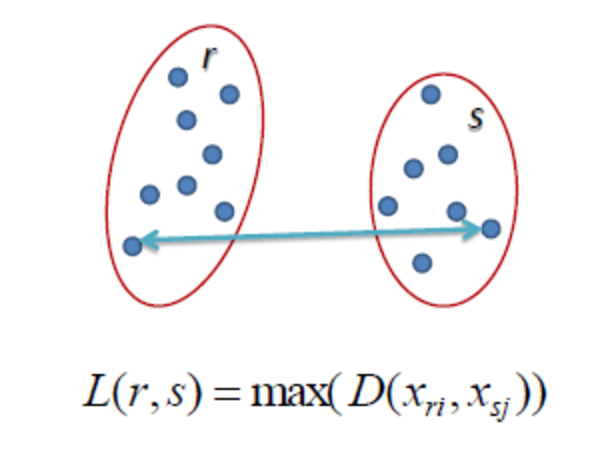

In [192]:
Image(PATH + '/images/complete.png', width=500)

## Average Linkage

Is the average distance between all points

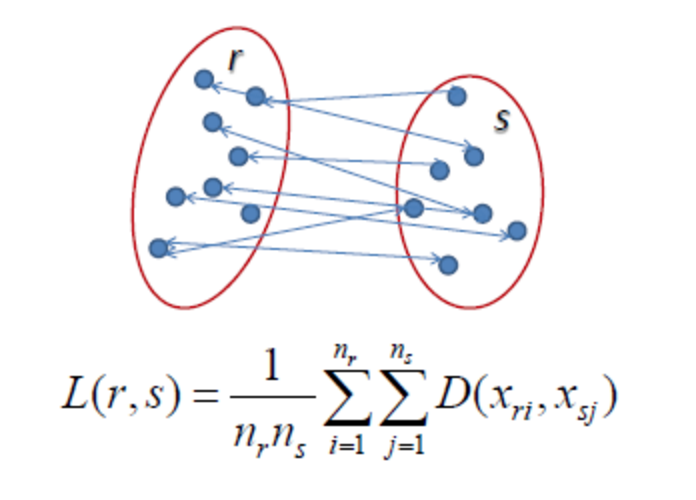

In [74]:
Image(PATH + '/images/average.png')

## Check: does scaling matter?

## Which is best?

## You don't reeaaally think there is a simple answer do you?

- Single can cause "chaining" where clusters are too spread out

- Complete can cause crowding where points are closer to another cluster than their own

- Average tries to strike a balance, but tends to be less intrepretable

## But how do we choose the number of clusters like this?

## <center>Eyeball it.</center>
<br><br>
### (Pro-tip: Don't use Google image search for the word "eyeball")

## Where we cut the trees determines this

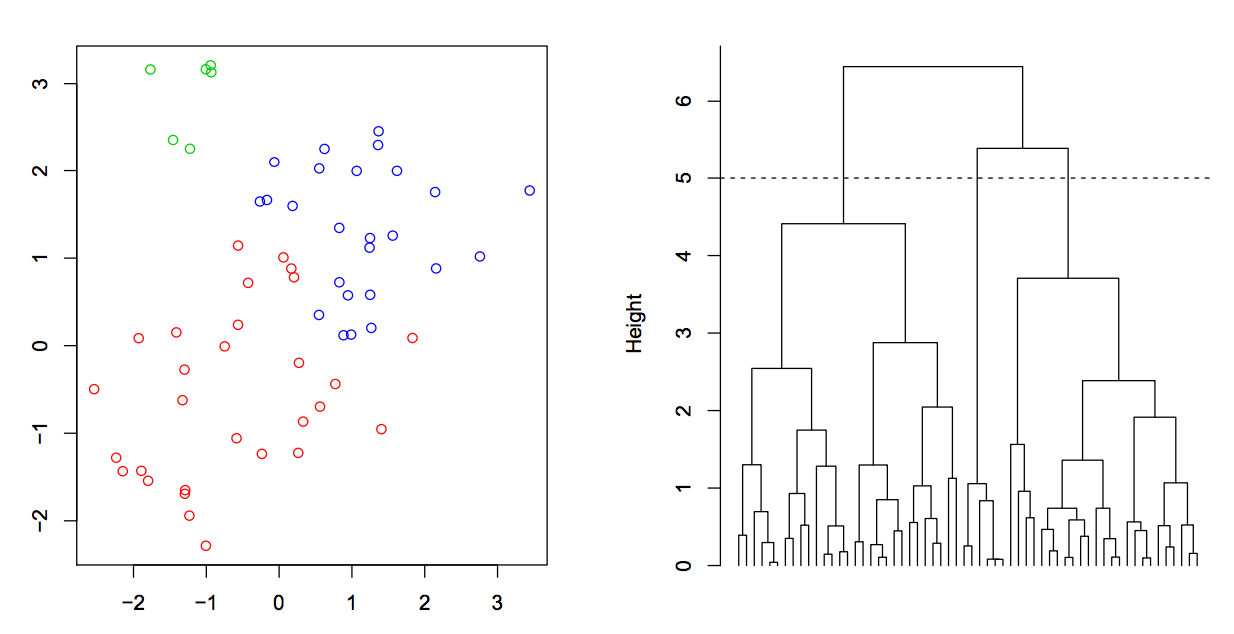

In [75]:
Image(PATH + '/images/cut_point.png', width=700)

## Implementing hierarchical clustering in python

## Get our data...

In [92]:
X = pd.read_csv(PATH + '/data/cities.csv', index_col=0)

In [93]:
X

,BOS,NY,DC,MIA,CHI,SEA,SF,LA,DEN
BOS,0,206,429,1504,963,2976,3095,2979,1949
NY,206,0,233,1308,802,2815,2934,2786,1771
DC,429,233,0,1075,671,2684,2799,2631,1616
MIA,1504,1308,1075,0,1329,3273,3053,2687,2037
CHI,963,802,671,1329,0,2013,2142,2054,996
SEA,2976,2815,2684,3273,2013,0,808,1131,1307
SF,3095,2934,2799,3053,2142,808,0,379,1235
LA,2979,2786,2631,2687,2054,1131,379,0,1059
DEN,1949,1771,1616,2037,996,1307,1235,1059,0


In [197]:
from scipy.spatial import distance as ssd

## Pass it into SciPy's hierarchy.linkagage()

In [225]:
# due to open github issue with distance matrix using squareform
# see http://stackoverflow.com/questions/36520043/triangle-vs-square-distance-matrix-for-hierarchical-clustering-python
Z = hierarchy.linkage(ssd.squareform(X), method="complete")

## Then plot using hierarchy.dendrogram()

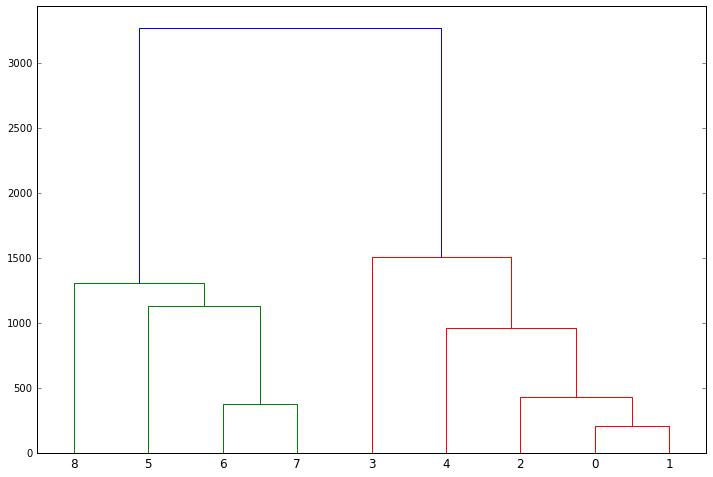

In [226]:
fig, ax = plt.subplots(figsize=(12,8))
dn = hierarchy.dendrogram(Z)

## We can change the orientation and add labels

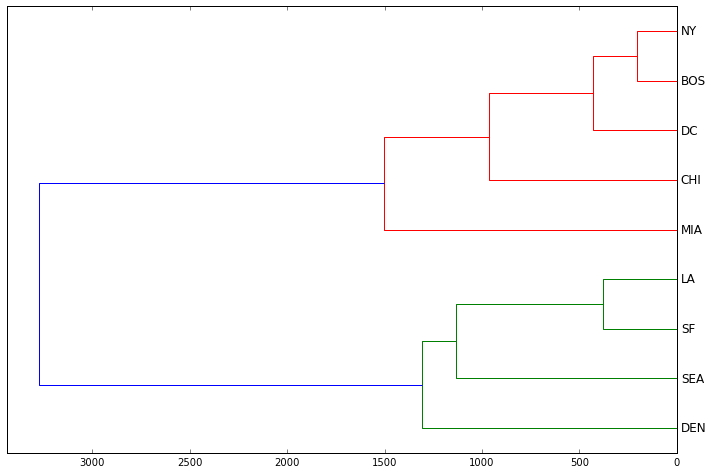

In [227]:
fig, ax = plt.subplots(figsize=(12,8))
dn = hierarchy.dendrogram(Z, orientation='left', labels=X.index)

## Change the cut point using .fcluster()

### Cut at 1000 miles

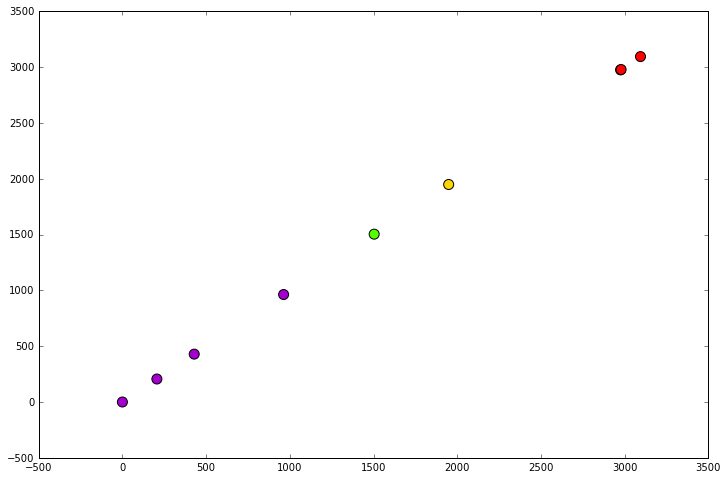

In [220]:
max_dist = 1000
clusters = hierarchy.fcluster(Z, max_dist, criterion='distance')

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X.iloc[:,0], X.iloc[:,0], c=clusters, cmap='prism', s=100);

## Cut at 2000 miles

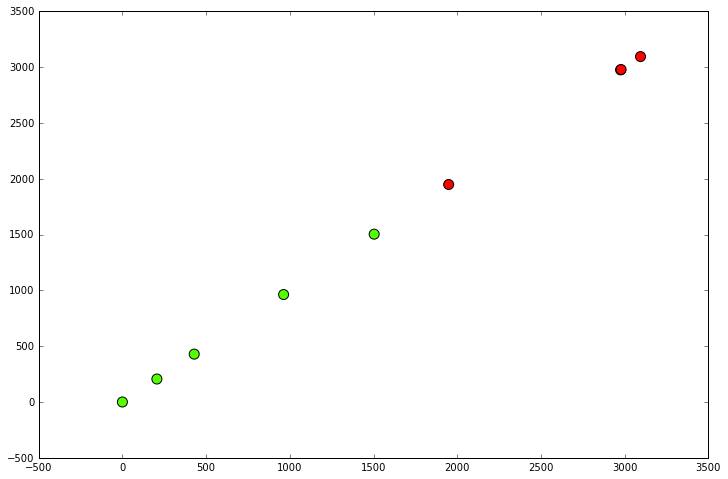

In [221]:
max_dist = 2000
clusters = hierarchy.fcluster(Z, max_dist, criterion='distance')

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X.iloc[:,0], X.iloc[:,0], c=clusters, cmap='prism', s=100);

## Check: How will using single linkage rather than complete affect this?

## Check single linkage

In [222]:
Z2 = hierarchy.linkage(ssd.squareform(X), 'single')

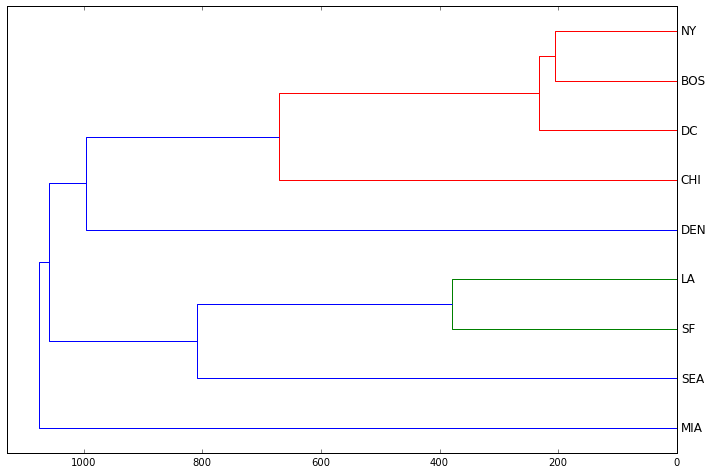

In [223]:
fig, ax = plt.subplots(figsize=(12,8))
dn = hierarchy.dendrogram(Z2, orientation='left', labels=X.index)

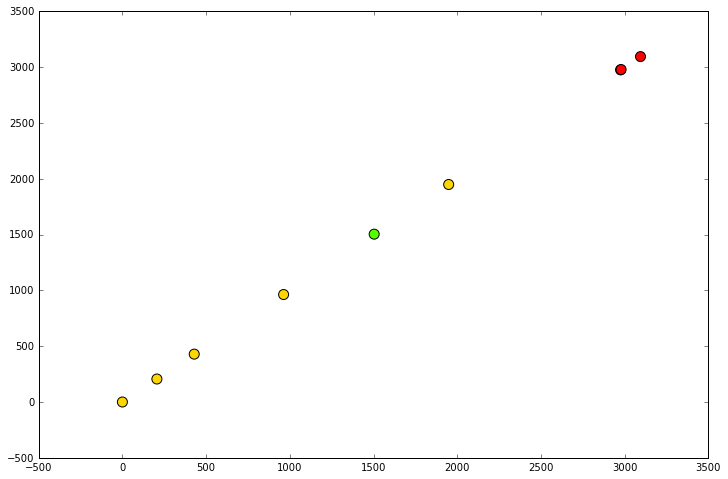

In [224]:
max_dist = 1000
clusters = hierarchy.fcluster(Z2, max_dist, criterion='distance')

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X.iloc[:,0], X.iloc[:,0], c=clusters, cmap='prism', s=100);

## Independent Practice

Utilize the starter code to practice hierarchical clustering on the iris dataset

## Hierarchical Clustering

Pros:

- No need to pick explicit k (...but kinda bc of split point)
- Repeatability (always get the same clusters)
- Can dial cluster levels at will
    
Cons:
    
- Runs in $~O(n^2)$ time - so must be relatively small dataset
- Requires selecting a linkage method